test cell

# Applied Machine Learning: Module 3 (Evaluation)

## Evaluation for Classification

### Preamble

In [2]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as asns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

dataset = load_digits()
X, y = dataset.data, dataset.target

for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name, class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [3]:
# create imbalanced target by setting everything not 1 as negative aka 0 (zero)
y_binary_imbalaced = y.copy()
y_binary_imbalaced[y_binary_imbalaced != 1] = 0

print('Original labels: ', y[1:30])
print('New binary labels: ', y_binary_imbalaced[1:30])

Original labels:  [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels:  [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [4]:
np.bincount(y_binary_imbalaced)

array([1615,  182])

In [5]:
# create, train and score svc classifier using imbalanced data
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalaced
                                                    , random_state = 0)

svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.90888888888888886

### Dummy Classifiers

In [6]:
# the dummy classifier won't even look at the data (X)
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)

y_dummy_predictions = dummy_majority.predict(X_test)
y_dummy_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [7]:
dummy_majority.score(X_test, y_test)

0.9044444444444445

In [8]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.97777777777777775

## Confusion matrices

### binary (two-class) confusion matrix

In [9]:
from sklearn.metrics import confusion_matrix

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)

y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('Most frequent class (dummy classifier)\n', confusion)

Most frequent class (dummy classifier)
 [[407   0]
 [ 43   0]]


In [10]:
dummy_classprop = DummyClassifier(strategy='stratified').fit(X_train, y_train)

y_classprop_predicted = dummy_classprop.predict(X_test)
confusion = confusion_matrix(y_test, y_classprop_predicted)

print('Random class-proportional prediction (dummy classifier)\n', confusion)

Random class-proportional prediction (dummy classifier)
 [[364  43]
 [ 41   2]]


In [11]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('Support vector machine classifier (linear kernel, C=1)\n', confusion)

Support vector machine classifier (linear kernel, C=1)
 [[402   5]
 [  5  38]]


In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

print('Logistic regression classifier (default settings)\n', confusion)

Logistic regression classifier (default settings)
 [[401   6]
 [  6  37]]


In [13]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Decision tree classifier (max_depth = 2)\n', confusion)

Decision tree classifier (max_depth = 2)
 [[400   7]
 [ 17  26]]


### Evaluation metrics for binary classification

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predicted)))

Accuracy: 0.95
Precision: 0.79
Recall: 0.60
F1: 0.68


In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_predicted, target_names=['not 1', '1']))

             precision    recall  f1-score   support

      not 1       0.96      0.98      0.97       407
          1       0.79      0.60      0.68        43

avg / total       0.94      0.95      0.94       450



## Decision functions

In [16]:
#decision function
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalaced
                                                   , random_state=0)

y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))

y_score_list

[(0, -23.177112362903241),
 (0, -13.541470729541413),
 (0, -21.722900989694729),
 (0, -18.907438437430027),
 (0, -19.735821729002289),
 (0, -9.7498078195600613),
 (1, 5.2349604859009276),
 (0, -19.307551661127864),
 (0, -25.101182889530396),
 (0, -21.827362391350579),
 (0, -24.151343401889438),
 (0, -19.576969790071697),
 (0, -22.574689400560423),
 (0, -10.823324268750714),
 (0, -11.912123406737392),
 (0, -10.97922371337485),
 (1, 11.206006114721543),
 (0, -27.646002317931909),
 (0, -12.859381428186682),
 (0, -25.848764845244997)]

In [17]:
# prediction probability
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalaced
                                                   , random_state=0)

y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20, 1]))

y_proba_list

[(0, 8.59622935435435e-11),
 (0, 1.3152654562877047e-06),
 (0, 3.6801368532691122e-10),
 (0, 6.1461593657683724e-09),
 (0, 2.6843647432086779e-09),
 (0, 5.8302468525539246e-05),
 (1, 0.99470119196307671),
 (0, 4.119427394145904e-09),
 (0, 1.2551475474865303e-11),
 (0, 3.3151024835512065e-10),
 (0, 3.2449262447677433e-11),
 (0, 3.1465167386169614e-09),
 (0, 1.5701348842784633e-10),
 (0, 1.9928808739415592e-05),
 (0, 6.7085339693943354e-06),
 (0, 1.7052039108840334e-05),
 (1, 0.99998640787132853),
 (0, 9.8513045790707473e-13),
 (0, 2.6015997081086803e-06),
 (0, 5.9432508848392272e-12)]

## Multi-Class Classification

<IPython.core.display.Javascript object>


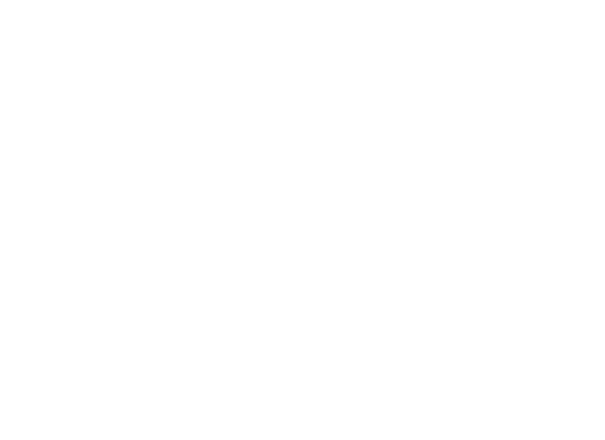

<IPython.core.display.Javascript object>


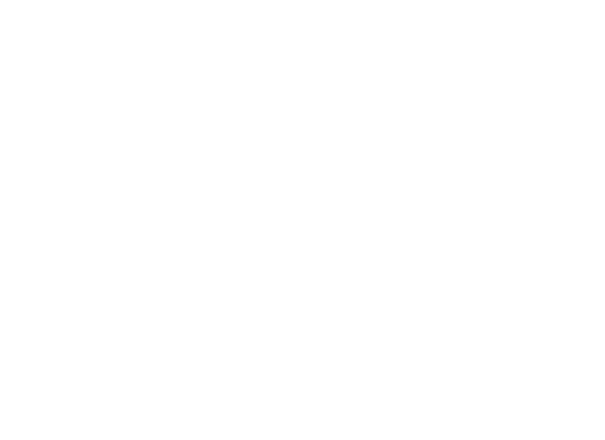

Text(0.5,14.7222,'Predicted Label')

In [18]:
import seaborn as sns
from sklearn.svm import SVC

dataset = load_digits()

X, y = dataset.data, dataset.target
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y
                                                                , random_state=0)

svm = SVC(kernel='linear').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc)

plt.figure(figsize=(5.5, 4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM Linear Kernel \nAccuracy: {0:.3f}'
         .format(accuracy_score(y_test_mc, svm_predicted_mc)))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

svm = SVC(kernel = 'rbf').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc)

plt.figure(figsize=(5.5, 4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM RBF Kernel \nAccuracy: {0:.3f}'
         .format(accuracy_score(y_test_mc, svm_predicted_mc)))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

### Multi-class classification report

In [19]:
print(classification_report(y_test_mc, svm_predicted_mc))

             precision    recall  f1-score   support

          0       1.00      0.65      0.79        37
          1       1.00      0.23      0.38        43
          2       1.00      0.39      0.56        44
          3       1.00      0.93      0.97        45
          4       0.14      1.00      0.25        38
          5       1.00      0.33      0.50        48
          6       1.00      0.54      0.70        52
          7       1.00      0.35      0.52        48
          8       1.00      0.02      0.04        48
          9       1.00      0.55      0.71        47

avg / total       0.93      0.49      0.54       450



### Micro vs. macro averaged metrics

In [20]:
print('Micro-averaged precision = {:.2f} (treat instances equally)'
     .format(precision_score(y_test_mc, svm_predicted_mc, average='micro')))
print('Macro-averaged precision = {:.2f} (treat classes equally)'
     .format(precision_score(y_test_mc, svm_predicted_mc, average='macro')))

Micro-averaged precision = 0.49 (treat instances equally)
Macro-averaged precision = 0.91 (treat classes equally)


In [21]:
print('Micro-averaged f1 = {:.2f} (treat instances equally)'
     .format(f1_score(y_test_mc, svm_predicted_mc, average='micro')))
print('Macro-averaged f1 = {:.2f} (treat classes equally)'
     .format(f1_score(y_test_mc, svm_predicted_mc, average='macro')))

Micro-averaged f1 = 0.49 (treat instances equally)
Macro-averaged f1 = 0.54 (treat classes equally)


## Regression evaluation metrics

In [23]:
"""

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

diabetes = datasets.load_diabetes()

X = diabetes.data[:, None, 6]
Y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lm = LinearRegression().fit(X_train, y_train)
lm_dummy_mean = DummyRegressor(strategy='mean').fit(X_train, y_train)

y_predict = lm.predict(X_test)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)

print('Linear model, coefficients: ', lm.coef_)
print('Mean squared error (dummy): {:.2f}'
     .format(mean_squared_error(y_test, y_predict_dummy_mean)))
print('Mean squared error (linear model): {:.2f}'
     .format(mean_squared_error(y_test, y_predict)))
print('r2_score (dummy): {:.2f}'
     .format(r2_score(y_test, y_predict_dummy_mean)))
print('r2_score (linear model): {:.2f}'
     .format(r2_score(y_test, y_predict)))

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_predict, color='green', linewidth=2)
plt.plot(X_test, y_predict_dummy_mean, color='red', linestyle='dashed'
        , linewidth=2, label='dummy')

plt.show()
"""

"\n\n%matplotlib notebook\nimport matplotlib.pyplot as plt\nimport numpy as np\nfrom sklearn.model_selection import train_test_split\nfrom sklearn import datasets\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.metrics import mean_squared_error, r2_score\nfrom sklearn.dummy import DummyRegressor\n\ndiabetes = datasets.load_diabetes()\n\nX = diabetes.data[:, None, 6]\nY = diabetes.target\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)\n\nlm = LinearRegression().fit(X_train, y_train)\nlm_dummy_mean = DummyRegressor(strategy='mean').fit(X_train, y_train)\n\ny_predict = lm.predict(X_test)\ny_predict_dummy_mean = lm_dummy_mean.predict(X_test)\n\nprint('Linear model, coefficients: ', lm.coef_)\nprint('Mean squared error (dummy): {:.2f}'\n     .format(mean_squared_error(y_test, y_predict_dummy_mean)))\nprint('Mean squared error (linear model): {:.2f}'\n     .format(mean_squared_error(y_test, y_predict)))\nprint('r2_score (dummy): {:.2f}'\n     .fo

## Model selection using evaluation metrics

### Cross-validation example

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

dataset = load_digits()

X, y = dataset.data, dataset.target == 1
clf = SVC(kernel='linear', C=1)

print('Cross-validation (accuracy)'
     , cross_val_score(clf, X, y, cv=5))
print('Cross-validation (AUC)'
     , cross_val_score(clf, X, y, cv=5, scoring='roc_auc'))
print('Cross-validation (recall)'
     , cross_val_score(clf, X, y, cv=5, scoring='recall'))

Cross-validation (accuracy) [ 0.91944444  0.98611111  0.97214485  0.97493036  0.96935933]
Cross-validation (AUC) [ 0.9641871   0.9976571   0.99372205  0.99699002  0.98675611]
Cross-validation (recall) [ 0.81081081  0.89189189  0.83333333  0.83333333  0.83333333]


In [26]:
#grid search helps you select the best parameter
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

dataset = load_digits()

X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = SVC(kernel='rbf')
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

grid_clf_acc = GridSearchCV(clf, param_grid=grid_values)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test)

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

grid_clf_auc = GridSearchCV(clf, param_grid=grid_values
                           , scoring='roc_auc')
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test)

print('Test set AUC:', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)

Grid best parameter (max. accuracy):  {'gamma': 0.001}
Grid best score (accuracy):  0.996288047513
Test set AUC: 0.999828581224
Grid best parameter (max. AUC):  {'gamma': 0.001}
Grid best score (AUC):  0.99987412783


### Evaluation metrics supported for model selection

In [27]:
from sklearn.metrics.scorer import SCORERS

sorted(list(SCORERS.keys()))

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'log_loss',
 'mean_absolute_error',
 'mean_squared_error',
 'median_absolute_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']